In [2]:
import gdal
from netCDF4 import Dataset 
import numpy as np
import glob
import pandas as pd
import datetime
import pytz
import matplotlib.pyplot as plt
import VPRM_fun       # user-defined
import VPRM_params    # user-defined
import VPRM_input     # user-defined
import importlib

# Inputs
NLCD_2D = VPRM_input.NLCD_2D
NLCD    = VPRM_input.NLCD
IPSA    = VPRM_input.IPSA
X       = VPRM_input.X
Y       = VPRM_input.Y
EVI     = VPRM_input.EVI
LSWI    = VPRM_input.LSWI
EVImin  = VPRM_input.EVImin
EVImax  = VPRM_input.EVImax
EVIref  = VPRM_input.EVIref
EVIrefmin = VPRM_input.EVIrefmin
LSWImax = VPRM_input.LSWImax


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [2]:
# Change land cover
importlib.reload(VPRM_params)
print(VPRM_params.Domname)
# print(VPRM_params.DEL)
# print(VPRM_params.DEM)
# print(VPRM_params.DEH)
# print(VPRM_params.delT_day)
for item in VPRM_params.LC_dict.items():
    print(item)

# # Change UHI effects
# importlib.reload(VPRM_fun)
# from VPRM_fun import get_UHI_deltT
# deltaT = get_UHI_deltT()
# print(deltaT)


DEVasGRS_2021_apr_oct
('EVF', (0, 20, 40, 1, 446, 0.128, 0.25, 0.17))
('DBF', (0, 20, 40, 5, 570, 0.127, 0.271, 0.25))
('MXF', (0, 20, 40, 2, 629, 0.123, 0.244, -0.24))
('SHB', (2, 20, 40, 1, 321, 0.122, 0.028, 0.48))
('CRP', (5, 22, 40, 2, 1250, 0.075, 0.173, 0.82))
('GRS', (2, 18, 40, 1, 542, 0.213, 0.028, 0.72))
('WET', (0, 20, 40, 3, 558, 0.051, 0.081, 0.24))
('DEO', (2, 18, 40, 1, 542, 0.213, 0.028, 0.72))
('DEL', (2, 18, 40, 1, 542, 0.213, 0.028, 0.72))
('DEM', (2, 18, 40, 1, 542, 0.213, 0.028, 0.72))
('DEH', (2, 18, 40, 1, 542, 0.213, 0.028, 0.72))
('BRL', (0, 0, 0, 0, 0, 0, 0, 0))
('OTH', (0, 0, 0, 0, 0, 0, 0, 0))


In [3]:
# Outputs
OutDir  = '/data0/dwei/VPRMout/'   # output dir
Domname = VPRM_params.Domname

try: ncfile.close()  # just to be safe, make sure dataset is not already open.
except: pass

str_today = datetime.datetime.strftime(datetime.date.today(), '%Y%m%d') # string type
outfile = OutDir+Domname+'_'+str_today+'.nc'

# Opening a file, creating a new Dataset
ncfile = Dataset(outfile,mode='w',format='NETCDF4') 

# Creating dimensions
x_dim = ncfile.createDimension('Xdim', np.shape(NLCD_2D)[1])      # cols, equivalent to lon 
y_dim = ncfile.createDimension('Ydim', np.shape(NLCD_2D)[0])      # rows, equivalent to lat
time_dim = ncfile.createDimension('time', None) # unlimited axis (can be appended to).
#for dim in ncfile.dimensions.items():
#   print(dim)

# Creating attributes
#ncfile.title='NYC domain 2021'
#print(ncfile.title)

# Creating variables
# Define two variables with the same names as dimensions,
# a conventional way to define "coordinate variables".
x = ncfile.createVariable('Xdim', np.float32, ('Xdim',))
x.units = 'meter'
x.long_name = 'Projected meters east-west'

y = ncfile.createVariable('Ydim', np.float32, ('Ydim',))
y.units = 'meter'
y.long_name = 'Projected meters north-south'

time = ncfile.createVariable('time', np.float64, ('time',))
time.units = 'seconds since 00:00:00 UTC on 1 January 1970'
time.long_name = 'seconds since 00:00:00 UTC on 1 January 1970'
#print(time)

# Define a 3D variable to hold the data
GEE = ncfile.createVariable('GEE',np.float64,('time','Ydim','Xdim')) 
GEE.units = '\u03BCmoles m-2 s-1'
GEE.standard_name = 'Gross Ecosystem Exchange'

RES_H = ncfile.createVariable('RESH',np.float64,('time','Ydim','Xdim')) 
RES_H.units = '\u03BCmoles m-2 s-1'
RES_H.standard_name = 'Heterotrophic respiration'

RES_A = ncfile.createVariable('RESA',np.float64,('time','Ydim','Xdim')) 
RES_A.units = '\u03BCmoles m-2 s-1'
RES_A.standard_name = 'autotrophic respiration'

TEMP_out = ncfile.createVariable('TEMP',np.float64,('time','Ydim','Xdim')) 
TEMP_out.units = 'Celcius degree'
TEMP_out.standard_name = 'HRRR air temperature'

PAR_out = ncfile.createVariable('PAR',np.float64,('time','Ydim','Xdim')) 
PAR_out.units = '\u03BCmole.m-2.s-1'
PAR_out.standard_name = 'HRRR Photosynthetically active radiation'

# Writing the coordinates
X_cord = np.array(X).reshape(np.shape(NLCD_2D))
Y_cord = np.array(Y).reshape(np.shape(NLCD_2D))
x[:] = X_cord[0,:]    # east-west   
y[:] = Y_cord[:,0]    # north-south 

# ncfile= create_vprm_output('test3', np.shape(NLCD_2D)[1], np.shape(NLCD_2D)[0], X_cord[0,:], Y_cord[:,0])   
# print(ncfile)
print('------------- %s file created --------------' %outfile)



------------- /data0/dwei/VPRMout/DEVasGRS_2021_apr_oct_20220331.nc file created --------------


In [4]:
# main 
start_time = datetime.datetime.now()
print('======================================================')

# Model set up
start_date= datetime.datetime(2021, 3, 31, 20, 0, 0)
end_date  = datetime.datetime(2021, 10, 31, 19, 0, 0)
delta     = datetime.timedelta(days=1)
hours     = range(0, 24)
fmt_met   = '%Y%m%d'

dim       = 0
while start_date <= end_date: 
    date_str = datetime.datetime.strftime(start_date, fmt_met)      # string type
    DOY_str  = datetime.datetime.strftime(start_date.date(), "%j")  # string type
    print('         ...%s ; DOY %s...' %(date_str, DOY_str))
       
    # Get EVI, LSWI
    EVI_day  = EVI[:, int(DOY_str)-1]   
    LSWI_day = LSWI[:,int(DOY_str)-1]
    
    # Hourly loop to find the Tair and PAR
    for hour in hours: 
        hr_added = datetime.timedelta(hours = hour)
        dt_day = start_date+hr_added # eastern time
        dt_utc = VPRM_fun.et_to_utc(dt_day)
        #print('ET  :',dt_day)
        #print('UTC :', dt_utc)
        
        tmp_hr = VPRM_fun.get_HRRR_arr(dt_utc,'71', VPRM_params.bbox)
        dsw_hr = VPRM_fun.get_HRRR_arr(dt_utc,'123',VPRM_params.bbox)
        par_hr = dsw_hr*0.505*4.6
        
#         # UHI effect 
#         # Comment out if do not consider UHI effects
#         # hour can be used as index
#         tmp_UHI= deltaT[hour]*IPSA+tmp_hr.reshape(np.size(tmp_hr))
#         tmp_hr = tmp_UHI.reshape(np.shape(NLCD_2D))

        if np.size(tmp_hr)==0 or np.size(par_hr)==0:
            continue
            print("Skipped loop of hour %s in UTC" %dt_day)

        # Land cover loop
        # Initial conditions for GEE and RES are zeros
        GEE_hr   = np.zeros(np.size(NLCD))
        Res_H_hr = np.zeros(np.size(NLCD))
        Res_A_hr = np.zeros(np.size(NLCD))
        Res_t_hr = np.zeros(np.size(NLCD))
        for lc,params in VPRM_params.LC_dict.items():
                   
            Ind_lc = VPRM_params.LC_codes.get(lc)  
            if np.size(Ind_lc)==1:
                boo  = NLCD==Ind_lc
            elif np.size(Ind_lc)>1:
                boo1 = NLCD==Ind_lc[0]
                boo2 = NLCD==Ind_lc[1] 
                boo  = [b1 or b2 for b1,b2 in zip(boo1,boo2)]
                
            # Set water to zeros
            if lc=='OTH' or lc=='BRL':
                continue
            
            # Parameters
            Tmin   = params[0]
            Topt   = params[1]
            Tmax   = params[2]
            Tlow   = params[3]
            PAR_0  = params[4]
            lmbda  = params[5]
            alpha  = params[6]
            beta   = params[7]

            # Variables
            tmp_arr = tmp_hr.reshape(np.size(tmp_hr))
            par_arr = par_hr.reshape(np.size(par_hr))
            nan_ind = np.where(np.isnan(tmp_arr))
            tmp_arr[nan_ind] = 0.0
            par_arr[nan_ind] = 0.0

            # Calculation
            Tscale = np.asarray([VPRM_fun.get_Tscale(ta, Tmin, Tmax) for ta in tmp_arr[boo]])
            Pscale = VPRM_fun.get_Pscale(EVI_day[boo], EVImin[boo], EVImax[boo])
            Wscale = VPRM_fun.get_Wscale(LSWI_day[boo], LSWImax[boo])
            
            # Simple quality control
            Tscale = VPRM_fun.simpleQA_0_1(Tscale)
            Pscale = VPRM_fun.simpleQA_0_1(Pscale)
            Wscale = VPRM_fun.simpleQA_0_1(Wscale)
                                           
            GEE_hr[boo] = VPRM_fun.get_GEE(lmbda,Tscale,Pscale,Wscale,EVI_day[boo],par_arr[boo],PAR_0)
            Res_H_hr[boo], Res_A_hr[boo], Res_t_hr[boo] = \
            VPRM_fun.get_RES_tot(tmp_arr[boo], Tlow, alpha, beta, IPSA[boo], EVI_day[boo], EVIref, EVIrefmin)
                               
        # Save hourly data into variables created in nc file
        time[dim] = dt_day.timestamp()                       
        GEE[dim,:,:] = GEE_hr.reshape(np.shape(NLCD_2D))     
        RES_H[dim,:,:] = Res_H_hr.reshape(np.shape(NLCD_2D)) 
        RES_A[dim,:,:] = Res_A_hr.reshape(np.shape(NLCD_2D)) 
        TEMP_out[dim,:,:] = tmp_hr                           
        PAR_out[dim,:,:] = par_hr                           
              
        dim+=1
            
    start_date += delta

# close the output nc file
print('      time dimension  :' , np.shape(time))
print('      GEE dimension   :' , np.shape(GEE))
print('      Res_H dimension :' , np.shape(RES_H))
print('      Res_A dimension :' , np.shape(RES_A))
ncfile.close(); print('Netcdf file is closed!-------------')

time_dela = datetime.datetime.now()-start_time
print("================ Finished in %f mins ============" \
      %(time_dela.total_seconds()/60))



         ...20210331 ; DOY 090...
         ...20210401 ; DOY 091...
         ...20210402 ; DOY 092...
         ...20210403 ; DOY 093...
         ...20210404 ; DOY 094...
         ...20210405 ; DOY 095...
         ...20210406 ; DOY 096...
         ...20210407 ; DOY 097...
         ...20210408 ; DOY 098...
         ...20210409 ; DOY 099...
         ...20210410 ; DOY 100...
         ...20210411 ; DOY 101...
         ...20210412 ; DOY 102...
         ...20210413 ; DOY 103...
         ...20210414 ; DOY 104...
No such file []
No such file []
         ...20210415 ; DOY 105...
         ...20210416 ; DOY 106...
         ...20210417 ; DOY 107...
         ...20210418 ; DOY 108...
         ...20210419 ; DOY 109...
         ...20210420 ; DOY 110...
         ...20210421 ; DOY 111...
         ...20210422 ; DOY 112...
         ...20210423 ; DOY 113...
         ...20210424 ; DOY 114...
         ...20210425 ; DOY 115...
         ...20210426 ; DOY 116...
         ...20210427 ; DOY 117...
         ...2021

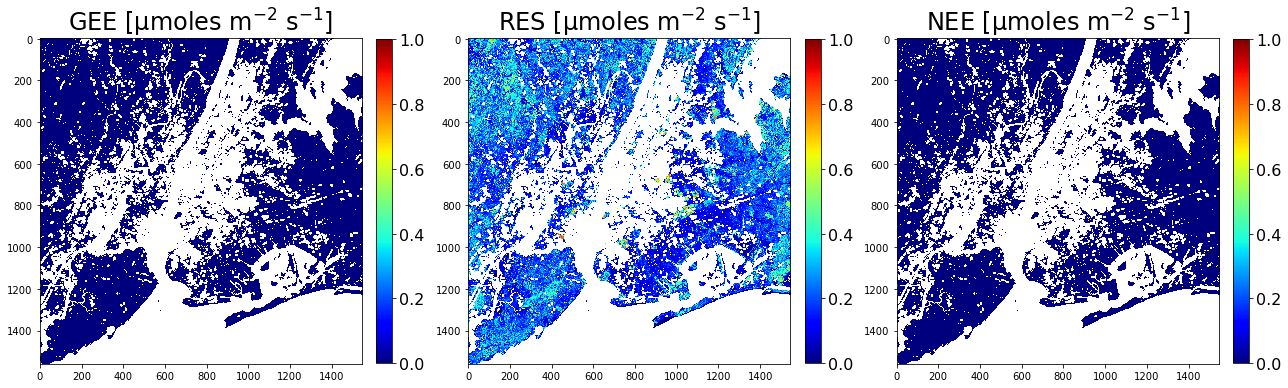

In [16]:
# A quick plot of hourly GEE and RES
NEE_hr = GEE_hr+Res_t_hr
plt.rcParams['axes.facecolor'] = 'w'

# Mask water surfaces
NLCD[NLCD==0] = 11    # NLCD has zeros in the southeast corner; set them to 11 as water
water_boo = NLCD==11   
masked_GEE_hr = np.ma.array(GEE_hr, mask=water_boo)
masked_RES_hr = np.ma.array(Res_A_hr, mask=water_boo)
masked_NEE_hr = np.ma.array(NEE_hr, mask=water_boo)

fig = plt.figure(figsize=(18,8)) #plt.subplots(2, 2, figsize=(15,6))
FontSize = 24
row = 1
col = 3

# GEE
ax = fig.add_subplot(row, col, 1)
im_gee = ax.imshow(-masked_GEE_hr.reshape(np.shape(NLCD_2D)),\
                   interpolation='none', vmin = 0, vmax = 1, cmap='jet')
ax.set_title('GEE [\u03BCmoles m$^{-2}$ s$^{-1}$]', fontsize = FontSize)
cbar = plt.colorbar(im_gee,ax=ax,fraction=0.046, pad=0.04) # magic numbers fraction and pad!
cbar.ax.tick_params(labelsize=FontSize-8)

# RES
ax = fig.add_subplot(row, col, 2)
ax.set_title('RES [\u03BCmoles m$^{-2}$ s$^{-1}$]', fontsize = FontSize)
im_rest = ax.imshow(masked_RES_hr.reshape(np.shape(NLCD_2D)),\
                    interpolation='none', vmin = 0, vmax = 1, cmap='jet')
cbar=plt.colorbar(im_rest,ax=ax,fraction=0.046, pad=0.04) # magic numbers fraction and pad!
cbar.ax.tick_params(labelsize=FontSize-8)

# NEE
ax = fig.add_subplot(row, col, 3)
ax.set_title('NEE [\u03BCmoles m$^{-2}$ s$^{-1}$]', fontsize = FontSize)
im_resh = ax.imshow(-masked_NEE_hr.reshape(np.shape(NLCD_2D)),\
                    interpolation='none',vmin =0, vmax = 1, cmap='jet')
cbar=plt.colorbar(im_resh,ax=ax, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=FontSize-8)

fig.tight_layout()


# Prior to bud burst (Start of Season), PScale set to 0
    PScale[1:(24*SOS_i)] <- 0
# PScale Set to 0 during dormancy (after 85% decrease in greenness)
    PScale[(24*EOS_i):length(PScale)] <- 0
    
# Parameters
alpha, beta, lambda, Tmin, Tmax, Topt, PAR_0, Tlow

Global parameters: EVIref(EVIrefmin)

# Variables
EVI (EVImin, EVImax), LSWI (LSWImax), PAR, Tair


# Things to fix
-------------------- Remove all the NaNs in the input data-------------
NLCD: no NaN; 57141 (2.4%) zeros [set all zero NLCD to "OTH" type]
IPSA: no NaN
EVI,LSWI: 43% NaN; no zeros
Tair,PAR: 8704 (0.4%, 37 hours) NaNs

-------------------- Secondary parameters------------- 

Defind growing season (DOY 80-250, Mar 21-Oct 27)
EVIref is at a non-urban reference site
EVIref,min is the minimum observed EVI at the reference site, representing a baseline leaf-off, woody biomass respiration

-------------------- MET data resampling------------- 
missing MET files: 2021-0415-08-UTC; 2022-1230-18-UTC and after
    